In [ ]:
import cv2
import numpy as np
import os
from google.colab import files

In [ ]:
!wget https://github.com/richzhang/colorization/raw/caffe/colorization/models/colorization_deploy_v2.prototxt -P /content/model/
!wget https://github.com/richzhang/colorization/raw/caffe/colorization/resources/pts_in_hull.npy -P /content/model/
!wget https://www.dropbox.com/s/dx0qvhhp5hbcx7z/colorization_release_v2.caffemodel?dl=1 -O /content/model/colorization_release_v2.caffemodel


In [ ]:
PROTOTXT = '/content/model/colorization_deploy_v2.prototxt'
POINTS = '/content/model/pts_in_hull.npy'
MODEL = '/content/model/colorization_release_v2.caffemodel'

In [ ]:
uploaded = files.upload()

Saving einstein.jpg to einstein.jpg


In [ ]:
print("Load model")
net = cv2.dnn.readNetFromCaffe(PROTOTXT, MODEL)
pts = np.load(POINTS)

Load model


In [ ]:
class8 = net.getLayerId("class8_ab")
conv8 = net.getLayerId("conv8_313_rh")
pts = pts.transpose().reshape(2, 313, 1, 1)
net.getLayer(class8).blobs = [pts.astype("float32")]
net.getLayer(conv8).blobs = [np.full([1, 313], 2.606, dtype="float32")]

In [ ]:
image_path = next(iter(uploaded))  # Get the uploaded image filename
image = cv2.imread(image_path)

In [ ]:
scaled = image.astype("float32") / 255.0
lab = cv2.cvtColor(scaled, cv2.COLOR_BGR2LAB)

In [ ]:
resized = cv2.resize(lab, (224, 224))
L = cv2.split(resized)[0]
L -= 50

In [ ]:
print("Colorizing the image")
net.setInput(cv2.dnn.blobFromImage(L))
ab = net.forward()[0, :, :, :].transpose((1, 2, 0))

Colorizing the image


In [ ]:
ab = cv2.resize(ab, (image.shape[1], image.shape[0]))

In [ ]:
L = cv2.split(lab)[0]
colorized = np.concatenate((L[:, :, np.newaxis], ab), axis=2)

# Convert back to BGR color space
colorized = cv2.cvtColor(colorized, cv2.COLOR_LAB2BGR)
colorized = np.clip(colorized, 0, 1)

# Convert to 0-255 range for display
colorized = (255 * colorized).astype("uint8")

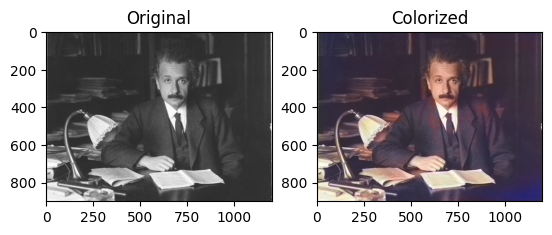

In [ ]:
from matplotlib import pyplot as plt

# Display the images
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(colorized, cv2.COLOR_BGR2RGB))
plt.title("Colorized")

plt.show()